In [1]:
# gradient_methods.py
"""Volume 2: Gradient Descent Methods.
Nathan Schill
Section 2
Thurs. Mar. 2, 2023
"""

import numpy as np
from scipy import optimize as opt
from scipy import linalg as la
import matplotlib.pyplot as plt

In [7]:
# Problem 1
def steepest_descent(f, Df, x0, tol=1e-5, maxiter=100):
    """Compute the minimizer of f using the exact method of steepest descent.

    Parameters:
        f (function): The objective function. Accepts a NumPy array of shape
            (n,) and returns a float.
        Df (function): The first derivative of f. Accepts and returns a NumPy
            array of shape (n,).
        x0 ((n,) ndarray): The initial guess.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        ((n,) ndarray): The approximate minimum of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """

    # Init
    converged = False    
    xk = x0
    dfxk = Df(xk)

    for i in range(1, maxiter+1):
        # Line search for a
        line = lambda a: f(xk - a*dfxk)
        ak = opt.minimize_scalar(line).x

        # Set next iteration
        xk = xk - ak*dfxk

        # Compute next derivative; determine if converged
        dfxk = Df(xk)
        if np.linalg.norm(dfxk, ord=np.inf) < tol:
            converged = True
            break
    
    return xk, converged, i

def f(t):
    x,y,z = t
    return x**4 + y**4 + z**4
def df(t):
    x,y,z = t
    return np.array([4*x**3, 4*y**3, 4*z**3])

x0 = np.array([1,2,3])
steepest_descent(f, df, x0)

(array([0.00538056, 0.00697149, 0.003187  ]), True, 5)

In [10]:
def f(t):
    x,y = t
    return 100*(y - x**2)**2 + (1 - x)**2
def df(t):
    x,y = t
    return np.array([2*100*(y - x**2)*(-2)*x + 2*(1 - x)*(-1),
                     2*100*(y - x**2)])

x0 = np.array([0.5, 0.5])
steepest_descent(f, df, x0, maxiter=10000)

(array([0.99998513, 0.99997021]), True, 3757)

In [33]:
# Problem 2
def conjugate_gradient(Q, b, x0, tol=1e-4):
    """Solve the linear system Qx = b with the conjugate gradient algorithm.

    Parameters:
        Q ((n,n) ndarray): A positive-definite square matrix.
        b ((n, ) ndarray): The right-hand side of the linear system.
        x0 ((n,) ndarray): An initial guess for the solution to Qx = b.
        tol (float): The convergence tolerance.

    Returns:
        ((n,) ndarray): The solution to the linear system Qx = b.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """

    converged = True
    
    # Get dimension of space
    n = Q.shape[0]

    ### Follow Algorithm 12.1 in the lab PDF
    xk = x0
    rk = Q@x0 - b
    dk = -rk

    k = 0
    while np.linalg.norm(rk) >= tol:
        if k >= n:
            # Already completed n iterations, so break
            converged = False
            break
        
        ak = rk@rk / (dk@Q@dk)
        xk = xk + ak*dk
        rk1 = rk + ak*Q@dk
        bk = rk1@rk1 / (rk@rk)
        dk = -rk1 + bk*dk

        rk = rk1
        k += 1
    
    return xk, converged, k


In [42]:
Q = np.array([[2, 0], [0, 4]])
b = np.array([1, 8])

x0 = np.array([0.6, 3])
conjugate_gradient(Q, b, x0)

(array([0.5, 2. ]), True, 2)

In [43]:
def f(t):
    x,y = t
    return x**2 + 2*y**2 - x - 8*y
def df(t):
    x,y = t
    return np.array([2*x - 1, 4*y - 8])

x0 = np.array([1, 1])
steepest_descent(f, df, x0)

(array([0.50000475, 2.00000057]), True, 7)

In [51]:
# Generate Q, b, and the initial guess x0
n = 4
A = np.random.random((n,n))
Q = A.T @ A
b, x0 = np.random.random((2,n))
x = conjugate_gradient(Q, b, x0)[0]
np.allclose(Q @ x, b)

True

In [2]:
# Problem 3
def nonlinear_conjugate_gradient(f, df, x0, tol=1e-5, maxiter=100):
    """Compute the minimizer of f using the nonlinear conjugate gradient
    algorithm.

    Parameters:
        f (function): The objective function. Accepts a NumPy array of shape
            (n,) and returns a float.
        Df (function): The first derivative of f. Accepts and returns a NumPy
            array of shape (n,).
        x0 ((n,) ndarray): The initial guess.
        tol (float): The stopping tolerance.
        maxiter (int): The maximum number of iterations to compute.

    Returns:
        ((n,) ndarray): The approximate minimum of f.
        (bool): Whether or not the algorithm converged.
        (int): The number of iterations computed.
    """
    
    converged = True
   
    ### Follow Algorithm 12.2 in the lab PDF
    xk = x0
    rk = -df(xk)
    dk = rk
    
    line = lambda a: f(xk + a*dk)
    ak = opt.minimize_scalar(line).x

    xk = xk + ak*dk

    k = 1
    while np.linalg.norm(rk) >= tol:
        if k >= maxiter:
            converged = False
            break
        
        rk1 = -df(xk)
        bk = rk1@rk1 / (rk@rk)
        dk = rk1 + bk*dk

        line = lambda a: f(xk + a*dk)
        ak = opt.minimize_scalar(line).x

        xk = xk + ak*dk
        
        rk = rk1
        k += 1
    
    return xk, converged, k

In [8]:
def f(t):
    x,y = t
    return 100*(y - x**2)**2 + (1 - x)**2
def df(t):
    x,y = t
    return np.array([2*100*(y - x**2)*(-2)*x + 2*(1 - x)*(-1),
                     2*100*(y - x**2)])

x0 = np.array([2,2])
nonlinear_conjugate_gradient(f, df, x0, maxiter=1000)

(array([1.00000121, 1.00000242]), True, 119)

In [24]:
def f(x):
    Q = np.diag([1,2,3])
    b = np.array([0,0,0])

    return x@Q@x/2 - b@x
def df(x):
    b = np.array([0,0,0])
    return x@Q - b

x = np.array([1,2,3])
# f(x), Q@x
x0 = np.array([1,2,3])
nonlinear_conjugate_gradient(f, df, x0, maxiter=1000)

(array([-3.69373570e-17, -9.18178140e-18, -1.13656354e-18]), True, 4)

In [55]:
opt.fmin_cg(opt.rosen, np.array([10, 10]), fprime=opt.rosen_der)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 102
         Gradient evaluations: 102


array([1.00000007, 1.00000015])

In [80]:
# Problem 4
def prob4(filename='linregression.txt',
          x0=np.array([-3482258, 15, 0, -2, -1, 0, 1829])):
    """Use conjugate_gradient() to solve the linear regression problem with
    the data from the given file, the given initial guess, and the default
    tolerance. Return the solution to the corresponding Normal Equations.
    """
    
    # Load data
    # Each row: y, x1, ..., xn
    A = np.loadtxt(filename)

    # Get vector of y
    b = A[:, 0].copy()

    # Set first column to 1
    # Each row: 1, x1, ..., xn
    A[:, 0] = 1

    # Get Q = A^T A to solve normal eqn A^T A x = A^T b
    Q = A.T@A
    ATb = A.T@b

    return conjugate_gradient(Q, ATb, x0)[0]
    
prob4()

array([-3.48225800e+06,  1.50163079e+01, -3.58158119e-02, -2.02018899e+00,
       -1.03316876e+00, -5.10969536e-02,  1.82915214e+03])

In [122]:
# Problem 5
class LogisticRegression1D:
    """Binary logistic regression classifier for one-dimensional data."""

    def fit(self, x, y, guess):
        """Choose the optimal beta values by minimizing the negative log
        likelihood function, given data and outcome labels.

        Parameters:
            x ((n,) ndarray): An array of n predictor variables.
            y ((n,) ndarray): An array of n outcome variables.
            guess (array): Initial guess for beta.
        """
        
        # Define negative log likelihood function
        def NLL(b):
            b0, b1 = b
            return np.sum(np.log(1 + np.exp(-(b0 + b1*x))) + (1-y)*(b0 + b1*x))
        
        # Save b0, b1 minimizing NLL
        self.b0, self.b1 = opt.fmin_cg(NLL, guess, disp=False)

    def predict(self, x):
        """Calculate the probability of an unlabeled predictor variable
        having an outcome of 1.

        Parameters:
            x (float): a predictor variable with an unknown label.
        """
        
        # Return sigma(x)
        return 1/(1 + np.exp(-(self.b0 + self.b1*x)))


LogReg = LogisticRegression1D()
    
# x: ambient temp
# y: 1 if O-ring damage present, 0 else
data = np.load('challenger.npy').T

LogReg.fit(data[0], data[1], np.array([20., -1.]))

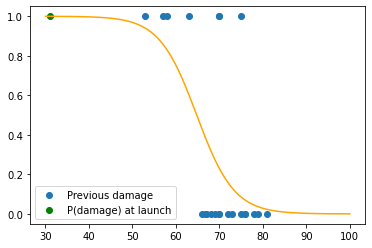

0.999609671069125

In [127]:
# Problem 6
def prob6(filename='challenger.npy', guess=np.array([20., -1.])):
    """Return the probability of O-ring damage at 31 degrees Farenheit.
    Additionally, plot the logistic curve through the challenger data
    on the interval [30, 100].

    Parameters:
        filename (str): The file to perform logistic regression on.
                        Defaults to "challenger.npy"
        guess (array): The initial guess for beta.
                        Defaults to [20., -1.]
    """
    
    # x: ambient temp
    # y: 1 if O-ring damage present, 0 else
    data = np.load(filename).T

    # Fit logistic regression
    LogReg = LogisticRegression1D()
    LogReg.fit(data[0], data[1], guess)

    # Prediction for 31 degrees F
    x = 31
    y = LogReg.predict(x)

    # Plot
    domain = np.linspace(30, 100, 200)
    plt.plot(domain, LogReg.predict(domain), color='orange')
    plt.scatter(data[0], data[1], label='Previous damage')
    plt.scatter(x, y, label='P(damage) at launch', color='green')
    plt.legend()
    plt.show()
    
    return y

prob6()